# 1. Teste Mann Whitney

- Teste não paramétrico;
- Duas amostras independentes.

#### Objetivo: Analisar a diferença entre as medianas das notas de mulheres e homens na prova de matemática e de ciências da natureza.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set()

In [2]:
enem_sp = pd.read_csv(r'C:\Users\herna\OneDrive\Análise de Dados com Python\enem_2019_tratado.csv',sep=',',encoding='iso-8859-1')

In [4]:
colegiox = enem_sp.loc[enem_sp['CO_ESCOLA']==35017632.0]

colegiox_mulher = colegiox.loc[colegiox['SEXO']=='F']

colegiox_homem = colegiox.loc[colegiox['SEXO']=='M']

## 2. Analisando a classificação das variáveis

In [5]:
colegiox.dtypes

NU_INSCRICAO                object
NO_MUNICIPIO_RESIDENCIA     object
IDADE                        int64
SEXO                        object
TP_ESTADO_CIVIL              int64
RACA                        object
TP_NACIONALIDADE             int64
TP_ST_CONCLUSAO              int64
ESCOLA                      object
CO_ESCOLA                  float64
NO_MUNICIPIO_ESC            object
TP_PRESENCA_CN               int64
TP_PRESENCA_CH               int64
TP_PRESENCA_LC               int64
TP_PRESENCA_MT               int64
NOTA_CN                    float64
NOTA_CH                    float64
NOTA_LC                    float64
NOTA_MT                    float64
TP_LINGUA                   object
TP_STATUS_REDACAO          float64
COMP1                      float64
COMP2                      float64
COMP3                      float64
COMP4                      float64
COMP5                      float64
NOTA_REDACAO               float64
INTERNET                    object
dtype: object

## 3. Analisando valores faltantes

In [6]:
colegiox.isnull().sum()

NU_INSCRICAO               0
NO_MUNICIPIO_RESIDENCIA    0
IDADE                      0
SEXO                       0
TP_ESTADO_CIVIL            0
RACA                       0
TP_NACIONALIDADE           0
TP_ST_CONCLUSAO            0
ESCOLA                     0
CO_ESCOLA                  0
NO_MUNICIPIO_ESC           0
TP_PRESENCA_CN             0
TP_PRESENCA_CH             0
TP_PRESENCA_LC             0
TP_PRESENCA_MT             0
NOTA_CN                    0
NOTA_CH                    0
NOTA_LC                    0
NOTA_MT                    0
TP_LINGUA                  0
TP_STATUS_REDACAO          0
COMP1                      0
COMP2                      0
COMP3                      0
COMP4                      0
COMP5                      0
NOTA_REDACAO               0
INTERNET                   0
dtype: int64

## 4. Analisando normalidade

- Nível de significância de 0,05 0u 5%;
- Quando p > 0.05, distribuição normal.

#### Notas de matemática

In [8]:
# teste shapiro-wilk

stats.shapiro(colegiox_mulher['NOTA_MT'])

ShapiroResult(statistic=0.7194505929946899, pvalue=5.430648343462963e-06)

Text(0.5, 1.0, 'Normal Q-Q Plot (mulheres)')

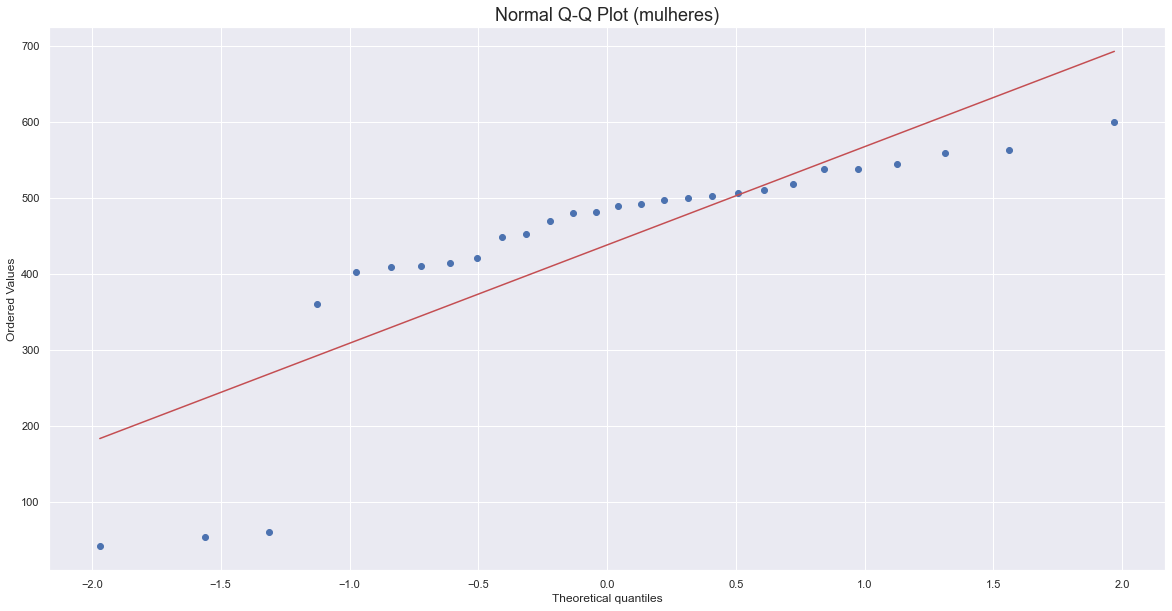

In [10]:
plt.figure(figsize=(20,10))
stats.probplot(colegiox_mulher['NOTA_MT'], dist='norm', plot=plt);
plt.title('Normal Q-Q Plot (mulheres)', fontsize=18)

In [11]:
# teste shapiro-wilk

stats.shapiro(colegiox_homem['NOTA_MT'])

ShapiroResult(statistic=0.865959882736206, pvalue=0.0462011992931366)

Text(0.5, 1.0, 'Normal Q-Q Plot (homens)')

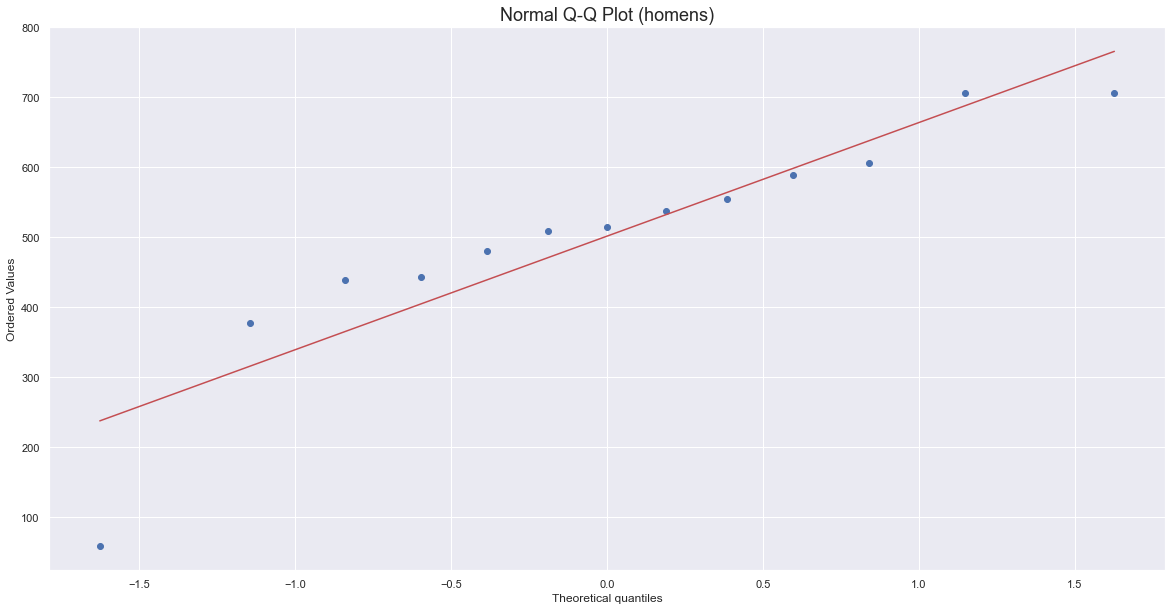

In [12]:
plt.figure(figsize=(20,10))
stats.probplot(colegiox_homem['NOTA_MT'], dist='norm', plot=plt);
plt.title('Normal Q-Q Plot (homens)', fontsize=18)

#### Notas de ciências de natureza

In [13]:
# teste shapiro-wilk

stats.shapiro(colegiox_mulher['NOTA_CN'])

ShapiroResult(statistic=0.7065987586975098, pvalue=3.536277517923736e-06)

Text(0.5, 1.0, 'Normal Q-Q Plot (mulheres)')

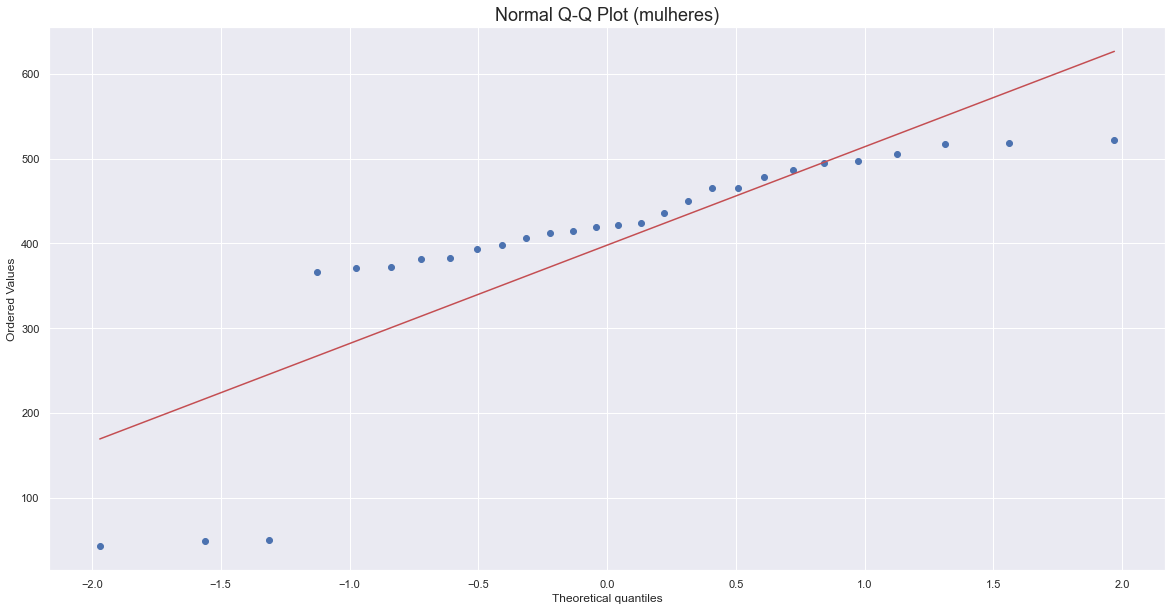

In [14]:
plt.figure(figsize=(20,10))
stats.probplot(colegiox_mulher['NOTA_CN'], dist='norm', plot=plt);
plt.title('Normal Q-Q Plot (mulheres)', fontsize=18)

In [15]:
# teste shapiro-wilk

stats.shapiro(colegiox_homem['NOTA_CN'])

ShapiroResult(statistic=0.7647997736930847, pvalue=0.0026814276352524757)

Text(0.5, 1.0, 'Normal Q-Q Plot (homens)')

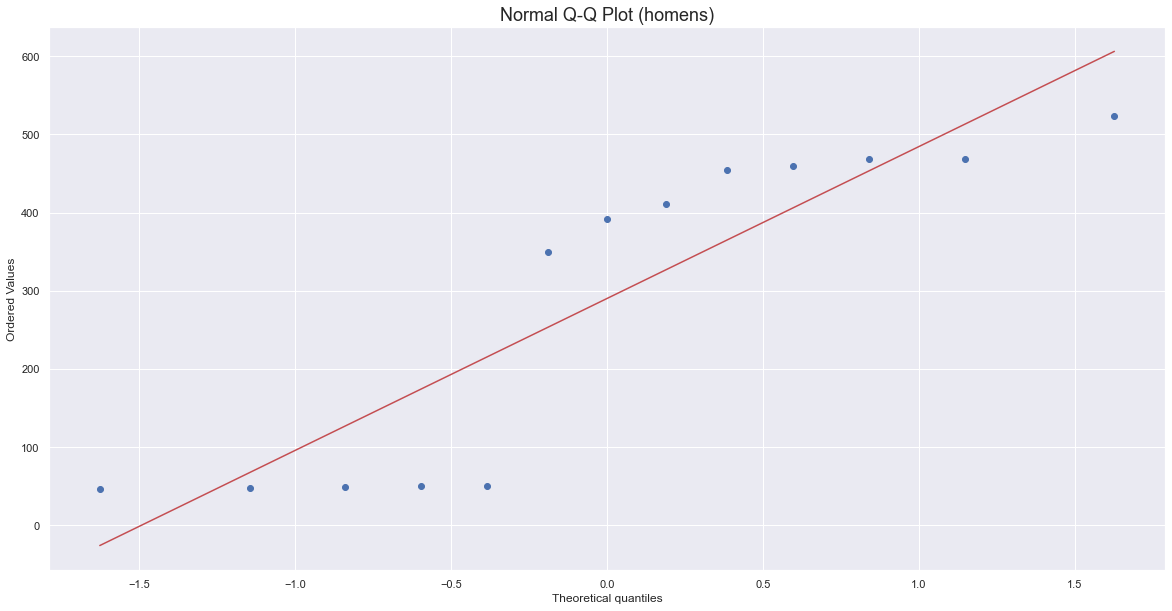

In [16]:
plt.figure(figsize=(20,10))
stats.probplot(colegiox_homem['NOTA_CN'], dist='norm', plot=plt);
plt.title('Normal Q-Q Plot (homens)', fontsize=18)

## 5. Aplicação do Teste Mann Whitney

- Ho = Não há diferença entre as medianas das notas de homens e mulheres: p > 0.05;
- Ha = Há diferença entre as medianas das notas entre homens e mulheres: p <= 0.05

#### Nota de matemática

In [18]:
stat, p = stats.mannwhitneyu(colegiox_mulher['NOTA_MT'], colegiox_homem['NOTA_MT'])
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p))

Estatística de teste: 127.0
p-valor: 0.06339241814609269


#### Nota de ciências da natureza

In [19]:
stat, p = stats.mannwhitneyu(colegiox_mulher['NOTA_CN'], colegiox_homem['NOTA_CN'])
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p))

Estatística de teste: 136.0
p-valor: 0.10119800798647943


## 6. Interpretação

Estatísticamente, não é possível dizer que existe diferença entre as notas de homens e mulheres nas provas de matemáticas e ciências da natureza.